In [19]:
import gym
import numpy as np
import random
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [20]:
# Create the CartPole environment
env = gym.make('CartPole-v1')

# Hyperparameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
batch_size = 32
n_episodes = 1000
output_dir = 'model_output/cartpole/'

# Q-learning agent with a neural network (Deep Q-Network)
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # Discount factor
        self.epsilon = 1.0   # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [ ]:
# Initialize the DQN agent
agent = DQNAgent(state_size, action_size)

for e in range(n_episodes):
    state, _ = env.reset()  # Correct this line to handle new Gym API
    state = np.reshape(state, [1, state_size])

    for time in range(500):
        action = agent.act(state)
        next_state, reward, done, _, _ = env.step(action)  # Update for newer Gym API
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        if done:
            print(f"episode: {e}/{n_episodes}, score: {time}, e: {agent.epsilon:.2}")
            break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

env.close()

episode: 0/1000, score: 16, e: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/kpradjinata/Documents/Research/OpenAIGym/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1

In [7]:
import gym
import numpy as np
import random
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Hyperparameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
batch_size = 16  # Smaller batch size for faster updates
n_episodes = 50  # Reduce number of episodes for quicker demo
max_steps = 200  # Limit steps per episode
memory_limit = 1000  # Smaller memory size for quicker demo


# Q-learning agent with a neural network (Deep Q-Network)
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=memory_limit)  # Limit memory size
        self.gamma = 0.95    # Discount factor
        self.epsilon = 1.0   # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)  # Disable verbose
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, min(len(self.memory), batch_size))  # Handle smaller memory
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])  # Disable verbose
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)  # Disable verbose
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [12]:
from tqdm import tqdm

# Initialize the DQN agent
agent = DQNAgent(state_size, action_size)


/Users/kpradjinata/Documents/Research/OpenAIGym/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:

# Use tqdm for progress monitoring
with tqdm(total=n_episodes) as pbar:  # Set up tqdm progress bar
    for e in range(n_episodes):
        state, _ = env.reset()  # Only take the state
        state = np.reshape(state, [1, state_size])

        for time in range(500):
            action = agent.act(state)
            next_state, reward, done, truncated, _ = env.step(action)
            reward = reward if not (done or truncated) else -10
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done or truncated)
            state = next_state
            if done or truncated:
                pbar.set_description(f"Episode {e + 1}, Score: {time}, Epsilon: {agent.epsilon:.2f}")
                break
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
        
        # Update the progress bar
        pbar.update(1)

env.close()


/Users/kpradjinata/Documents/Research/OpenAIGym/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Episode 50, Score: 65, Epsilon: 0.01: 100%|████| 50/50 [1:34:25<00:00, 113.31s/it]


In [ ]:
# Test the agent after training
n_test_episodes = 5
agent.epsilon = 0  # Set epsilon to 0 to only exploit (no exploration)

for e in range(n_test_episodes):
    state, _ = env.reset()  # Reset the environment
    state = np.reshape(state, [1, state_size])
    total_reward = 0
    
    for time in range(max_steps):
        env.render()  # Uncomment this line if you want to render the environment
        action = agent.act(state)  # Use the trained model to take an action
        next_state, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        next_state = np.reshape(next_state, [1, state_size])
        state = next_state
        
        if done or truncated:
            print(f"Test Episode {e + 1}: Total Reward: {total_reward}")
            break

env.close()  # Close the environment when done


/Users/kpradjinata/Documents/Research/OpenAIGym/venv/lib/python3.11/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Test Episode 1: Total Reward: 18.0
Test Episode 2: Total Reward: 20.0
Test Episode 3: Total Reward: 18.0
Test Episode 4: Total Reward: 18.0
Test Episode 5: Total Reward: 18.0


In [ ]:
# Save the trained model
agent.model.save("cartpole_dqn_model.h5")


In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError


# Register the custom loss function if it's not registered automatically
custom_objects = {'mse': MeanSquaredError()}

# Load the trained model with custom objects
loaded_model = load_model("cartpole_dqn_model.h5", custom_objects=custom_objects)

agent.model = loaded_model  # Set the agent's model to the loaded model


Evaluating Episodes: 100%|██████████████████████| 500/500 [02:49<00:00,  2.96it/s]


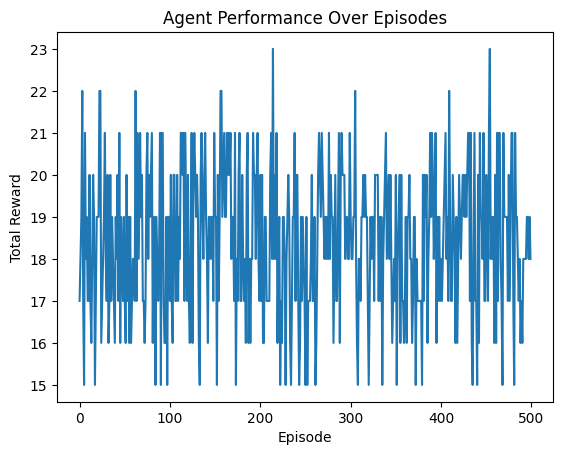

In [22]:
# Assuming you have the environment set up (e.g., CartPole)
env = gym.make('CartPole-v1')

n_episodes = 500  # Number of episodes to evaluate the model
scores = []  # To store total reward per episode

# Run the trained model to evaluate its performance with tqdm for progress monitoring
for episode in tqdm(range(n_episodes), desc="Evaluating Episodes"):
    state, _ = env.reset()  # Reset environment and get initial state
    state = np.reshape(state, [1, 4])  # Reshape state if necessary (adjust depending on state size)
    total_reward = 0  # Initialize total reward for the episode
    
    for time in range(500):
        # Use the loaded model to predict the action
        action_values = loaded_model.predict(state, verbose=0)
        action = np.argmax(action_values[0])  # Choose the action with the highest Q-value
        
        next_state, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        next_state = np.reshape(next_state, [1, 4])  # Reshape next_state if necessary
        
        state = next_state  # Move to the next state
        
        if done or truncated:
            break  # End episode when done or truncated
    
    scores.append(total_reward)  # Store total reward for this episode



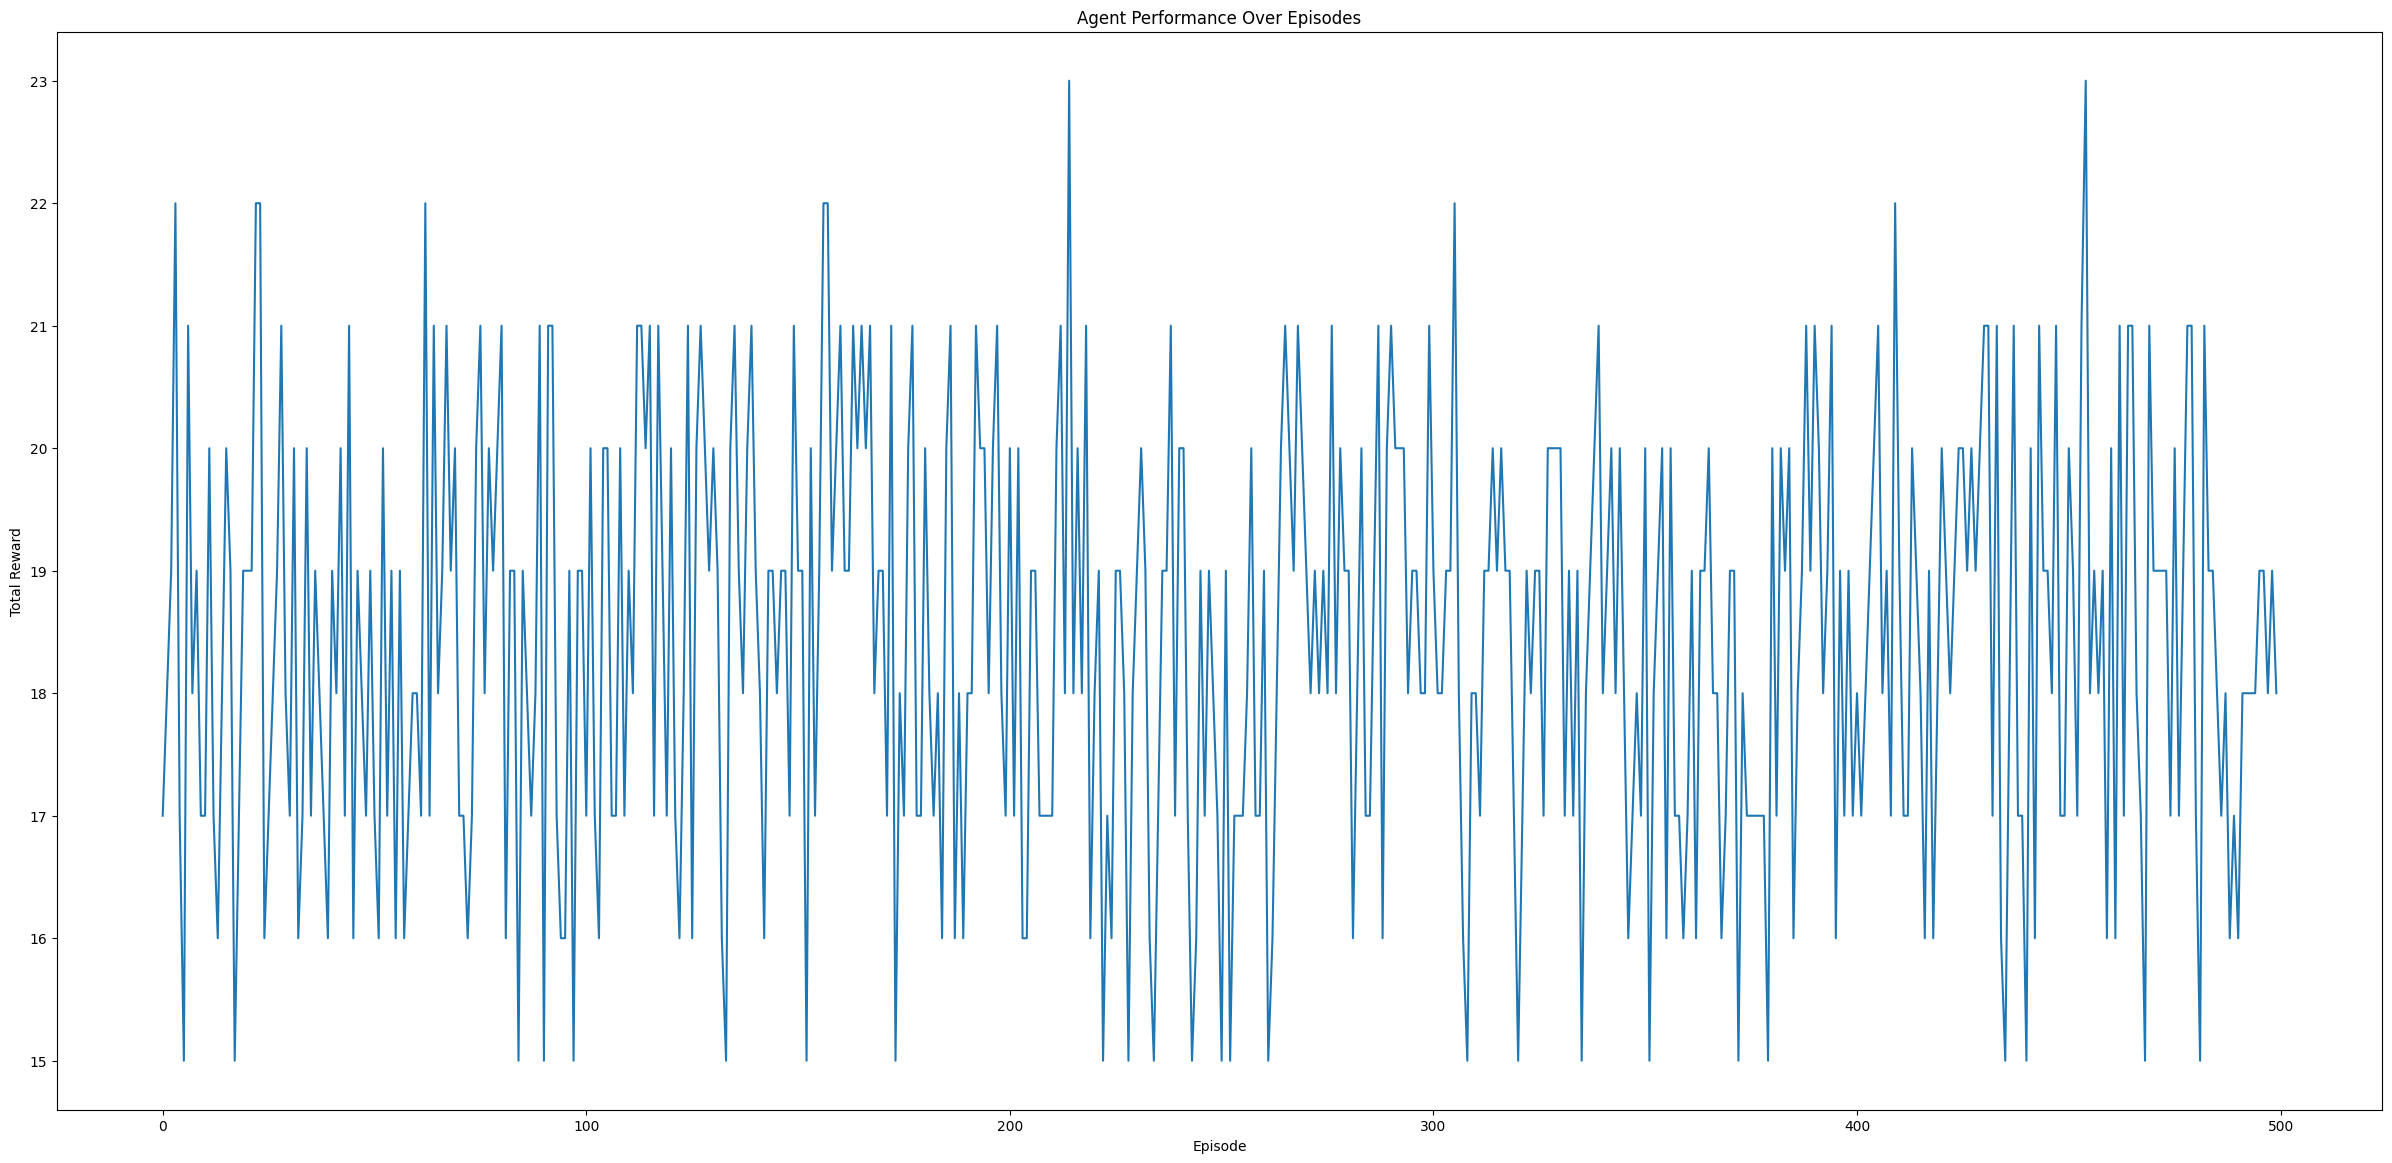

In [25]:
plt.figure(figsize=(30,14))
# Plot the total rewards over episodes
plt.plot(scores)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Agent Performance Over Episodes')
plt.show()
